# Άσκηση 1

### Ερώτημα γ

Εδώ λαμβάνουμε υπόψην την επίδραση της ηλιακής ακτινοβολίας στην τροχιά του δορυφόρου

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pylab as plt

Μας δίνονται τα εξής στοιχεία:

In [2]:
mu=3.986 *10**(14) #m^3/s^2
md=400*10**3 #kg
As=8000 #m^2
H=400*10**3 #m
Rearth=6371*10**3 #m
a=H+Rearth #m
N=6000
c=2.99*10**8 #m/s

Ο μετασχηματισμός από καρτεσιανές σε κεπλεριανές συντεταγμένες στο επίπεδο (οπότε μας ενδιαφέρουν μόνο a,e) είναι: 

In [3]:
def car2kep(cart,GM):
    x,y,vx,vy=cart
    rvec=np.array([x,y])
    vvec=np.array([vx,vy])  
    r=np.sqrt(x*x+y*y)
    v=np.sqrt(vx*vx+vy*vy)
    E=v*v/2-GM/r
    a=-GM/(2*E)
    evec=(1/GM)*((v**2 -GM/r)*rvec-np.inner(rvec,vvec)*vvec)
    e=np.sqrt(evec[0]**2+evec[1]**2)
    kep=a,e
    return kep 

In [4]:
def degtorad(th):
    return th*np.pi/180

T=2*np.pi*np.sqrt(a**3/mu)
t0=0
tmax=N*T
IC=[0,a,-np.sqrt(mu/a),0]

Για την περίπτωση που θεωρούμε ότι δεν έχουμε σκιά από τη Γη:

In [5]:
def rhs_2bp_pert_no_shadow(t,X):
    x,y,vx,vy=X
    r=np.sqrt(x*x+y*y)
    rvec=np.array([x,y])
    x_dot=vx
    y_dot=vy
    v=np.sqrt(vx**2+vy**2)
    SunEarth=149*10^9 #απόσταση Γης-Ήλιου σε m
    Cd=1.5
    S=1367 #W/m^2
    nper=degtorad(1)/(24*3600) #γωνιακή περιστροδή ήλιου σε s
    xs=SunEarth*np.cos(nper*t) #x συντεταγμένη απόστασης Γης-Ήλιου 
    ys=SunEarth*np.sin(nper*t) #y συντεταγμένη απόστασης Γης-Ήλιου 
    rs=np.array([xs,ys])
    shadow=1
    psr=-(shadow*S*Cd*As/(c*md))
    dist=np.sqrt((x-xs)**2+(y-ys)**2)
    fx=psr*(x-xs)/dist #διαταραχή στην x συνιστώσα
    fy=psr*(y-ys)/dist #διαταραχή στην y συνιστώσα
    vx_dot=-mu*x/(r*r*r) +fx
    vy_dot=-mu*y/(r*r*r) +fy
    return [x_dot,y_dot,vx_dot,vy_dot]


sol1=solve_ivp(rhs_2bp_pert_no_shadow,[t0,tmax],IC,t_eval=np.linspace(0,tmax,10*N),method='DOP853',atol=1e-10,rtol=1e-10)
yy1=sol1.y
tt1=sol1.t

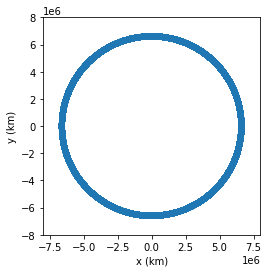

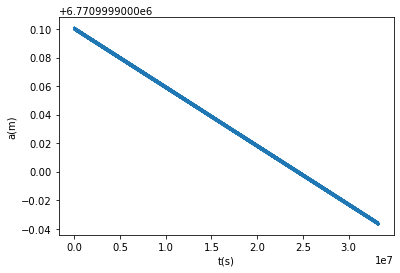

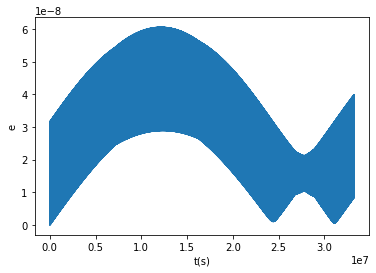

In [6]:
plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-8*10**6, 8*10**6)
plt.ylim(-8*10**6, 8*10**6)
plt.plot(yy1[0],yy1[1])
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.show()

orbitelements1=np.zeros((2,len(tt1)))
for i in range(len(tt1)):
    orbitelements1[:,i]=car2kep(yy1[:,i],mu)

plt.figure()
plt.plot(tt1,orbitelements1[0])
plt.xlabel('t(s)')
plt.ylabel('a(m)')
plt.show()

plt.figure()
plt.plot(tt1,orbitelements1[1])
plt.xlabel('t(s)')
plt.ylabel('e')
plt.show()

Για την περίπτωση που έχουμε σκιά από τη Γη:

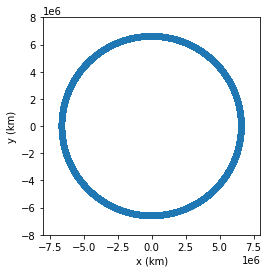

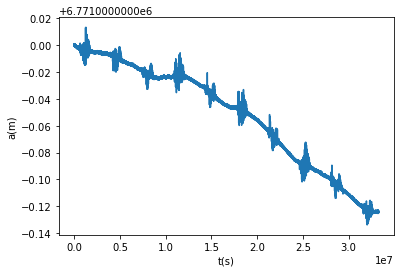

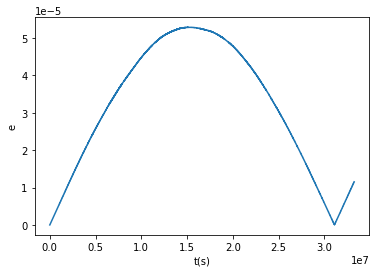

In [7]:
def rhs_2bp_pert_with_shadow(t,X):
    x,y,vx,vy=X
    r=np.sqrt(x*x+y*y)
    rvec=np.array([x,y])
    x_dot=vx
    y_dot=vy
    v=np.sqrt(vx**2+vy**2)
    #shadow=1
    SunEarth=149*10^9 #απόσταση Γης-Ήλιου σε m
    Cd=1.5
    S=1367 #W/m^2
    nper=degtorad(1)/(24*3600) #γωνιακή περιστροδή ήλιου σε s
    xs=SunEarth*np.cos(nper*t) #x συντεταγμένη απόστασης Γης-Ήλιου 
    ys=SunEarth*np.sin(nper*t) #y συντεταγμένη απόστασης Γης-Ήλιου 
    rs=np.array([xs,ys])
    AB=(r**2-(np.inner(rs,rvec)/np.sqrt(xs**2+ys**2))**2)**(1/2)
    
    if AB<Rearth and np.inner(rvec,rs)<0: #συνθήκη για το αν ο δορυφόρος είναι στη σκιά της Γης
        shadow=0
    else:
        shadow=1
    psr=-(shadow*S*Cd*As/(c*md))
    dist=np.sqrt((x-xs)**2+(y-ys)**2)
    fx=psr*(x-xs)/dist #διαταραχή στην x συνιστώσα
    fy=psr*(y-ys)/dist #διαταραχή στην y συνιστώσα
    vx_dot=-mu*x/(r*r*r) +fx
    vy_dot=-mu*y/(r*r*r) +fy
    return [x_dot,y_dot,vx_dot,vy_dot]


sol2=solve_ivp(rhs_2bp_pert_with_shadow,[t0,tmax],IC,t_eval=np.linspace(0,tmax,10*N),method='DOP853',atol=1e-10,rtol=1e-10)
yy2=sol2.y
tt2=sol2.t

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-8*10**6, 8*10**6)
plt.ylim(-8*10**6, 8*10**6)
plt.plot(yy2[0],yy2[1])
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.show()

orbitelements2=np.zeros((2,len(tt2)))
for i in range(len(tt2)):
    orbitelements2[:,i]=car2kep(yy2[:,i],mu)

plt.figure()
plt.plot(tt2,orbitelements2[0])
plt.xlabel('t(s)')
plt.ylabel('a(m)')
plt.show()

plt.figure()
plt.plot(tt2,orbitelements2[1])
plt.xlabel('t(s)')
plt.ylabel('e')
plt.show()

Παρατηρούμε ότι και στις 2 περιπτώσεις η επίδραση της ακτινοβολίας του ήλιου στην τροχιά του δορυφόρου είναι μικρή καθώς οι αλλαγές των a,e είναι πολύ μικρής τάξης όπως φαίνεται στα διαγράμματα. Βέβαια βλέπουμε ότι ακόμα και σε μικρή τάξη ο μεγάλος ημιάξονας έχει την τάση να μειώνεται και στις δυο περιπτώσεις. Συγκρίνοντας με την αεροδυναμική τριβή παρατηρούμε ότι η διαταραχή λόγω ακτινοβολίας έχει σαφώς μικρότερη επιρροή αφού στις 6000 περιόδους δεν παρατηρούμε πτώση του δορυφόρου στην γη ενώ στην άλλη περίπτωση είχε ήδη πέσει. Συγκεκριμένα η απόσταση δορυφόρου-γης στις 6000 περιστροφές με και χωρίς σκίαση είναι:

In [8]:
r1=np.sqrt(yy1[0,len(tt1)-1]**2+yy1[1,len(tt1)-1]**2)
r2=np.sqrt(yy2[0,len(tt2)-1]**2+yy2[1,len(tt2)-1]**2)
print("Χωρίς σκίαση: r1=",r1,"m, Με σκίαση: r2=",r2,"m")

Χωρίς σκίαση: r1= 6770999.919447062 m, Με σκίαση: r2= 6770923.716318025 m
